# Capstone Project 2

#### Please note that toxic words will be displayed in the visualizations for this capstone project.

## Data Exploration and Cleaning

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import os
import glob
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelBinarizer

In [2]:
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
print(train.comment_text[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [8]:
print(test.comment_text[0])

Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,


In [9]:
list(train)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

### Not all comments are toxic as shown above, however there are no other comment identifiers used for comments that are not toxic, severe_toxic, obscene, threat, insult, or identity_hate.

## Check for missing values

In [10]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [11]:
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
filling NA with "unknown"


## Determine the number of each comment type

In [12]:
toxic = train['toxic'].sum()
severe_toxic = train['severe_toxic'].sum()
obscene = train['obscene'].sum()
threat = train['threat'].sum()
insult = train['insult'].sum()
identity_hate = train['identity_hate'].sum()

In [13]:
print ('toxic comments', toxic)
print('severe toxic comments', severe_toxic)
print('obscene comments', obscene)
print('threatening comments', threat)
print('insulting comments', insult)
print('identity hate comments', identity_hate)

toxic comments 15294
severe toxic comments 1595
obscene comments 8449
threatening comments 478
insulting comments 7877
identity hate comments 1405


## Bar chart showing comment types

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
[0 1 2 3 4 5]
[15294, 1595, 8449, 478, 7877, 1405]


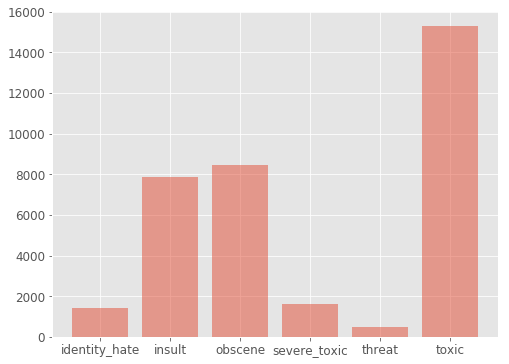

In [14]:
import matplotlib.pyplot as plt

num_comments = [toxic, severe_toxic, obscene, threat, insult, identity_hate]

objects = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(objects)
pos = np.arange(len(objects))
print (pos)
num_comments = [toxic, severe_toxic, obscene, threat, insult, identity_hate]
print(num_comments)
 
plt.bar(objects, num_comments, align='center', alpha=0.5)

plt.show()

## How many comments are friendly?

In [15]:
friendly = train.iloc[:,2:].sum(axis = 1)

In [16]:
train['friendly'] = (friendly == 0)
print ("Total comments ", len(train))
print ("Total clean comments ", train['friendly'].sum())

Total comments  159571
Total clean comments  143346


### Check the column names for the dataframe: train

In [17]:
list(train)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate',
 'friendly']

## Create correlation plot to see if some comments go together

In [18]:
# Take clean comment count out of df

corr_df = train.iloc[:,2:-1]

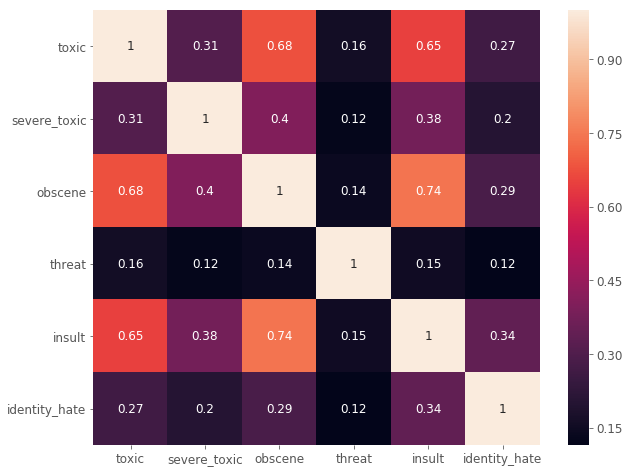

In [19]:
corr = corr_df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
plt.show()

### Some of the labels are higher correlated, e.g. insult-obscene has the highest at 0.74, followed by toxic-obscene and toxic-insult.

### Concatenate the train set and the test set and make a new dataframe, comment_length, containing the length of comments. Print out the new dataframe.

In [20]:
df = pd.concat([train, test], axis=0)

print(list(df))

comment_length = df['comment_text'].apply(len)

print(comment_length)

['comment_text', 'friendly', 'id', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
153134     554
153135     144
153136     559
153137     274
153138     135
153139     314
153140     135
153141     234
153142     163
153143      18
153144     119
153145     541
153146     265
153147      63
153148     146
153149      51
153150     596
153151     181
153152      60
153153     382
153154      82
153155     137
153156     277
153157     255
153158      63
153159      60
153160     198
153161     423
153162 

In [21]:
df_len = pd.Series.to_frame(comment_length)

### Assign 'comment_text'  as column name.

In [22]:
df_len.columns = ['comment_text']

In [23]:
# Check the type of df_len

type(df_len)

pandas.core.frame.DataFrame

In [24]:
# verify column label

list(df_len)

['comment_text']

## Plot number of letters in each comment

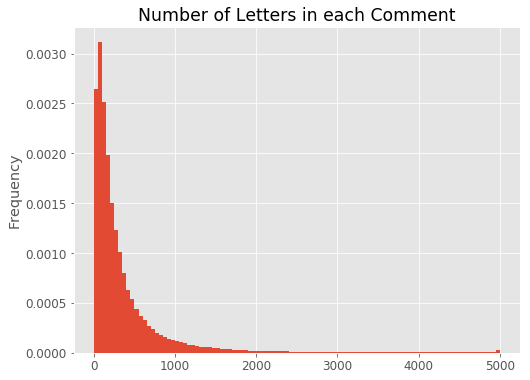

In [25]:
import matplotlib.pyplot as plt


letter_plot = df_len.plot(use_index = True, kind = 'hist', normed = 1, bins = 100, legend = None)
plt.title('Number of Letters in each Comment')

plt.show()

## Determine number of words in each comment and plot distribution

In [26]:
df.head()

,comment_text,friendly,id,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,Explanation\nWhy the edits made under my usern...,True,0000997932d777bf,0.0,0.0,0.0,0.0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,True,000103f0d9cfb60f,0.0,0.0,0.0,0.0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",True,000113f07ec002fd,0.0,0.0,0.0,0.0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",True,0001b41b1c6bb37e,0.0,0.0,0.0,0.0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",True,0001d958c54c6e35,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df['word_count'] = df['comment_text'].apply(lambda x: len(str(x).split(" ")))
df[['comment_text','word_count']].head()

,comment_text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


In [28]:
df['word_count'].max()

2834

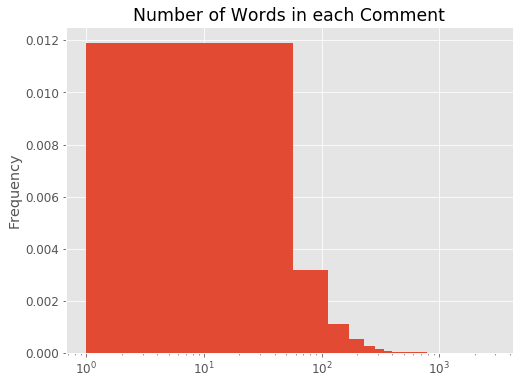

In [29]:
letter_plot = df['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment')
bins = 25
legend = None

plt.show()

##  Drop comments less than 10 words in length from the data  frame

In [30]:
df = df.drop(df[df.word_count < 10].index)

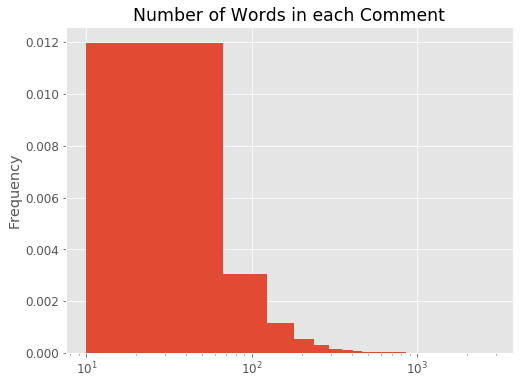

In [31]:
letter_plot = df['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment')
bins = 25
legend = None

plt.show()

In [32]:
df.word_count.count()

231742

## Repeat the above steps for the separate train and test data sets

In [33]:
comment_length_train = train['comment_text'].apply(len)

In [34]:
train_len = pd.Series.to_frame(comment_length_train)

In [35]:
train_len.columns = ['comment_text']

In [36]:
type(train_len)

pandas.core.frame.DataFrame

In [37]:
train['word_count'] = train['comment_text'].apply(lambda x: len(str(x).split(" ")))
train[['comment_text','word_count']].head()

,comment_text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


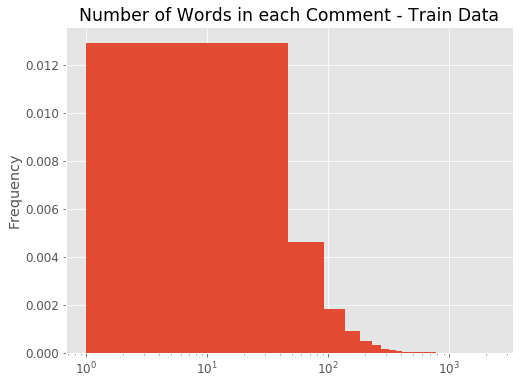

In [38]:
letter_plot = train['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Train Data')
bins = 25
legend = None

plt.show()

In [39]:
comment_length_test = test['comment_text'].apply(len)

test_len = pd.Series.to_frame(comment_length_test)

test_len.columns = ['comment_text']

test['word_count'] = test['comment_text'].apply(lambda x: len(str(x).split(" ")))
test[['comment_text','word_count']].head()

,comment_text,word_count
0,Yo bitch Ja Rule is more succesful then you'll...,72
1,== From RfC == \n\n The title is fine as it is...,13
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16
3,":If you have a look back at the source, the in...",38
4,I don't anonymously edit articles at all.,7


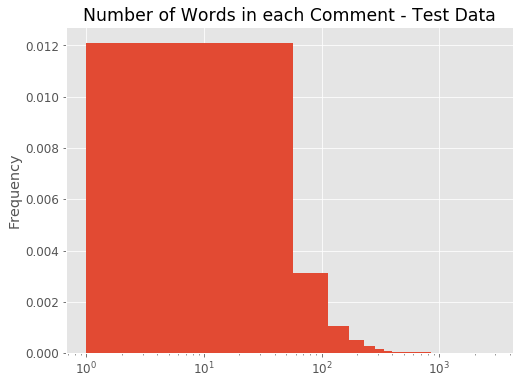

In [40]:
letter_plot = test['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Test Data')
bins = 25
legend = None

plt.show()

In [41]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,friendly,word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,42
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,18
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,112
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,13


## Find out which comments have multiple labels

In [42]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [43]:
train['how_many'] = train[columns].sum(axis = 1)

count_mult_class = train['how_many'].value_counts()

print (count_mult_class)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: how_many, dtype: int64


### From the above output:
####  5470 comments have one label
####  2678 comments have two labels
####  etc.

## Examples of comment types: 
### toxic, severe_toxic, obscene, threat, insult, identity_hate

In [44]:
print("toxic: ")
print(train[train.toxic == 1].iloc[1,1])

toxic: 
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [45]:
print("severe_toxic: ")
print(train[train.severe_toxic == 1].iloc[1,1])

severe_toxic: 
Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


In [46]:
print("obscene: ")
print(train[train.obscene == 1].iloc[1,1])

obscene: 
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [47]:
print("threat: ")
print(train[train.threat == 1].iloc[1,1])

threat: 
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


In [48]:
print("insult: ")
print(train[train.insult == 1].iloc[1,1])

insult: 
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [49]:
print("identity_hate: ")
print(train[train.identity_hate == 1].iloc[1,1])

identity_hate: 
A pair of jew-hating weiner nazi schmucks.


## Drop comments less than 10 words in length from the Train data set

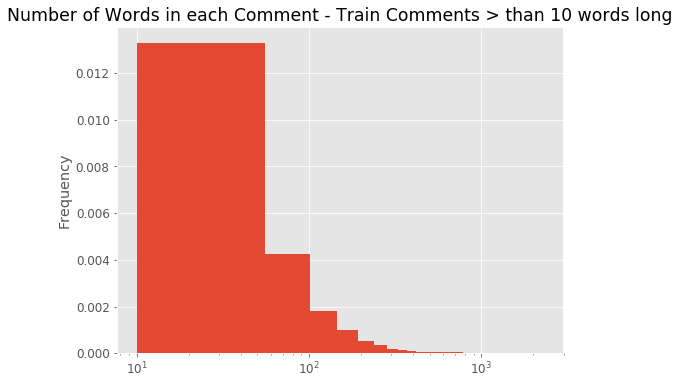

In [50]:
train = train.drop(train[train.word_count < 10].index)

letter_plot = train['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Train Comments > than 10 words long')
bins = 25
legend = None

plt.show()

In [51]:
train.word_count.count()

139516

## Drop comments less than 10 words in length from the Test data set

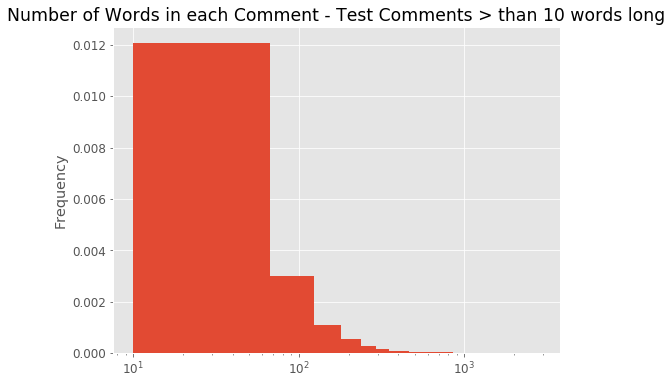

In [52]:
test = test.drop(test[test.word_count < 10].index)

letter_plot = test['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Test Comments > than 10 words long')
bins = 25
legend = None

plt.show()

def f(row):
    if row['toxic'] == 1:
        val = 0
    elif row['severe_toxic'] == 1:
        val = 1
    elif row ['obscene'] == 1:
        val = 2
    elif row['threat'] == 1:
        val = 3
    elif row['insult'] == 1:
        val = 4
    elif row['identity_hate'] == 1:
        val = 5
    else:
        val = -1
    return val

train['f_toxic'] = f('toxic')

train['type_comment'] = train.append(lb)

In [53]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,friendly,word_count,how_many
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,42,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,18,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,42,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,112,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,13,0


In [54]:
test.comment_text[0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

## Visualize comments using Wordclouds

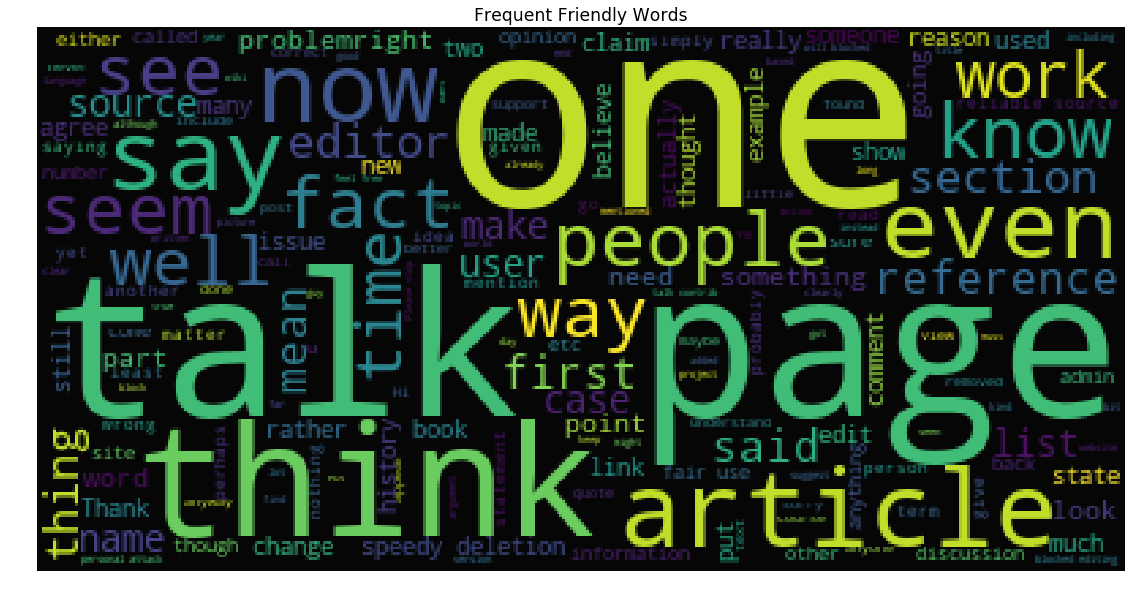

In [55]:
friendly_subset = train[train.friendly == True]

text = friendly_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

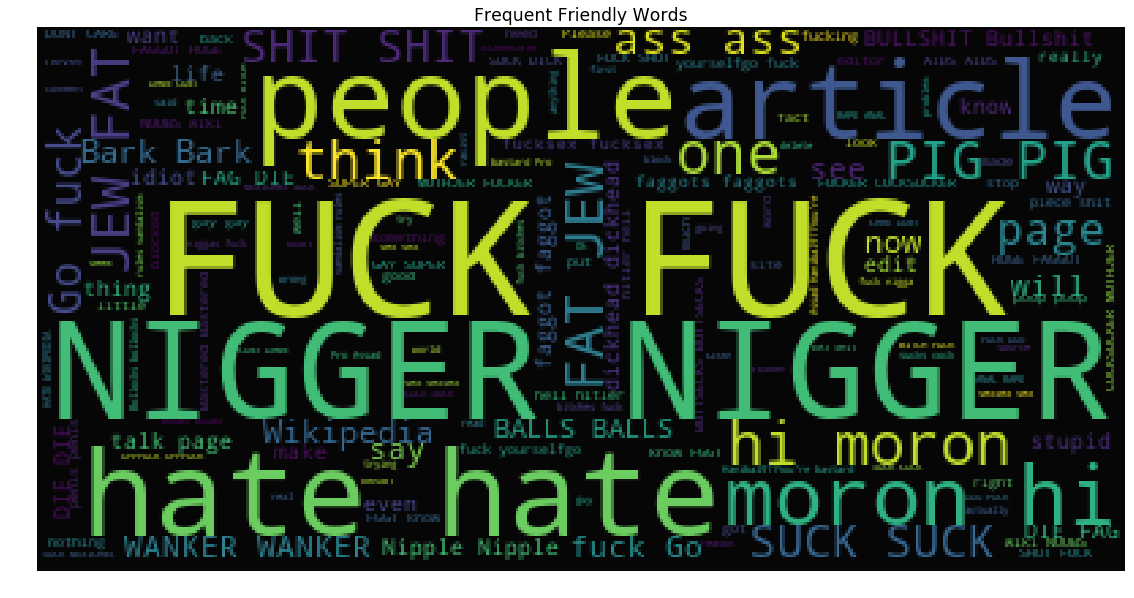

In [56]:
toxic_subset = train[train.toxic == 1]

text = toxic_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

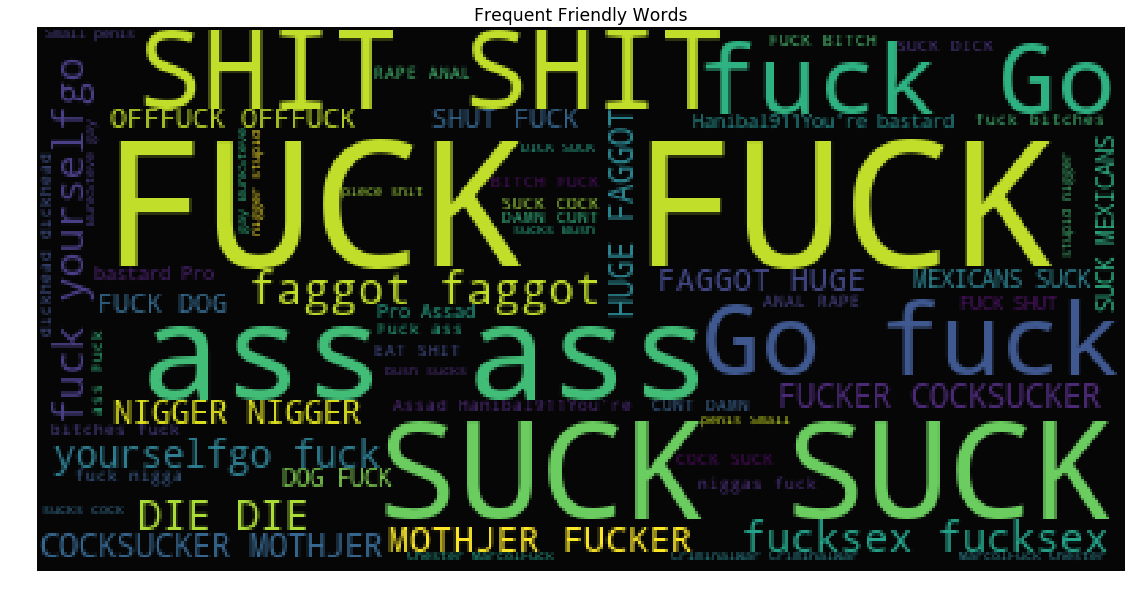

In [57]:
severe_toxic_subset = train[train.severe_toxic == 1]

text = severe_toxic_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

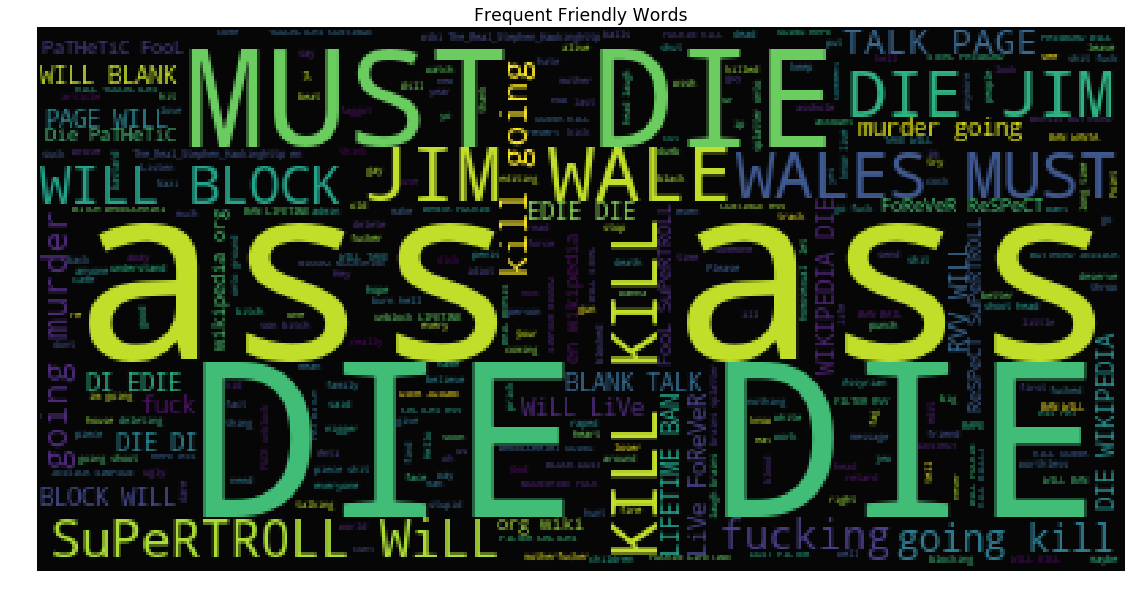

In [58]:
threat_subset = train[train.threat == 1]

text = threat_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

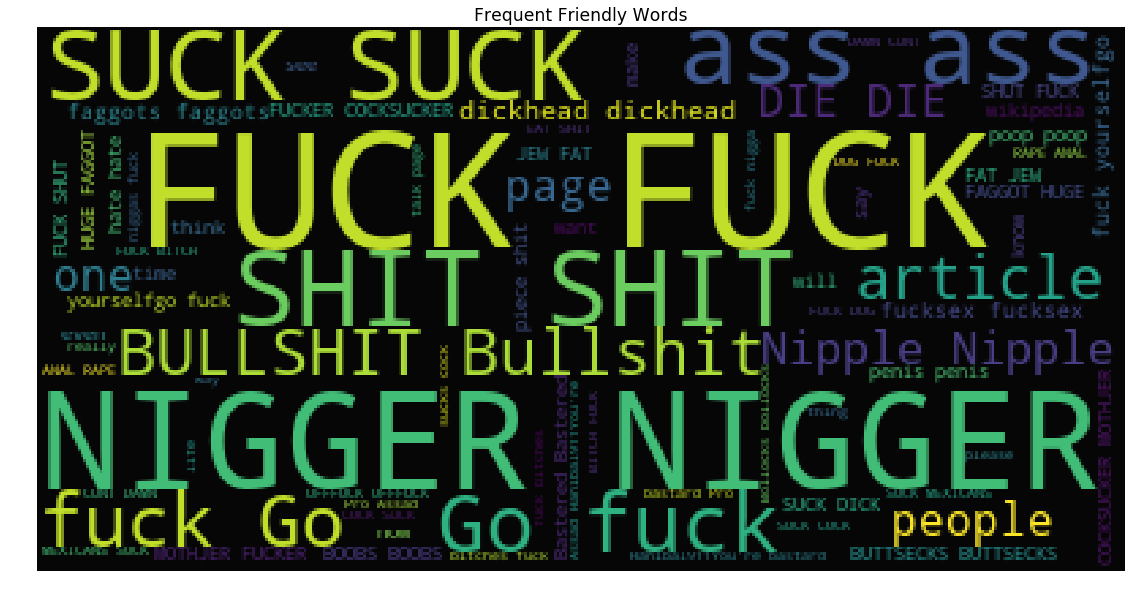

In [59]:
obscene_subset = train[train.obscene == 1]

text = obscene_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

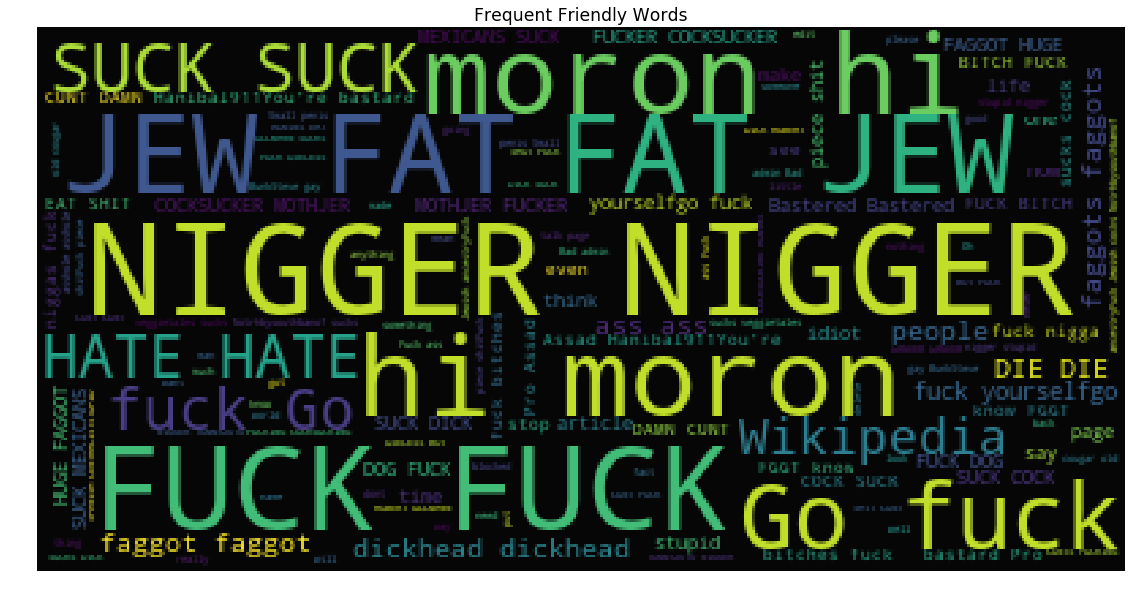

In [60]:
insult_subset = train[train.insult == 1]

text = insult_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

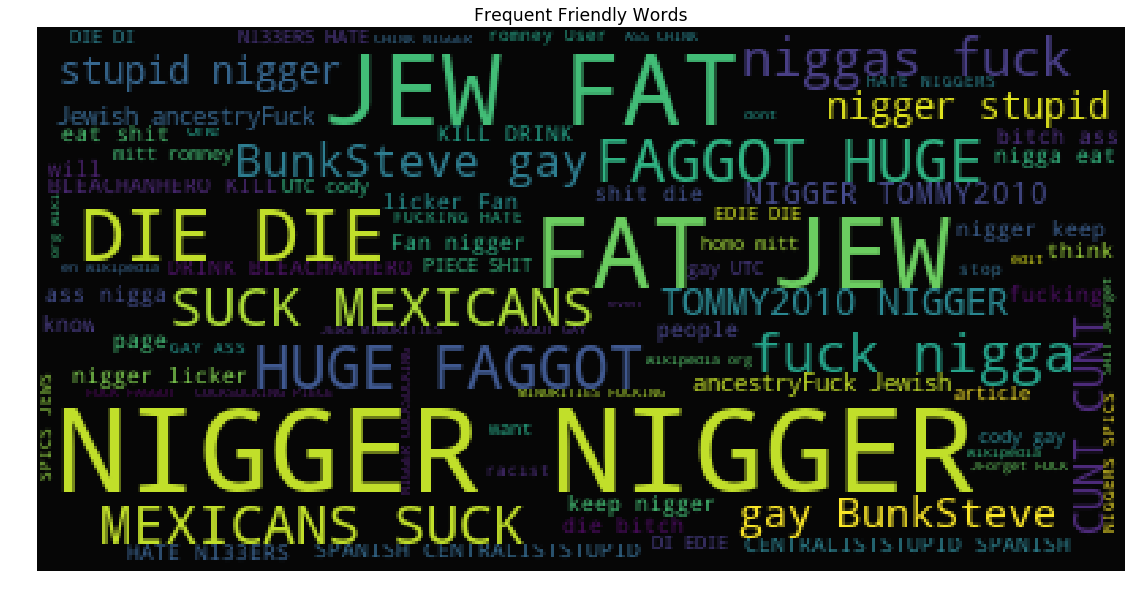

In [61]:
identity_hate_subset = train[train.identity_hate == 1]

text = identity_hate_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

## NLP

### First use CountVectorizer which makes a token/ngram a feature and stores its count in the corresponding feature space

### Apply .fit and .transform .fit indexes the features and .transform transforms the dataset into the matrix

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train.comment_text, train.toxic, train_size = 0.8)

C:\Users\hhtph\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [64]:
# initialize CountVectorizer
cv = CountVectorizer()

# fit and transform data
X_train_counts = cv.fit_transform(X_train)
X_train_counts.shape

(111612, 162450)

In [65]:
X_train_counts

<111612x162450 sparse matrix of type '<class 'numpy.int64'>'
	with 5454813 stored elements in Compressed Sparse Row format>

### Transform the test data into a matrix

In [66]:
X_test_counts = cv.transform(X_test)
X_test_counts.shape


(27904, 162450)

In [67]:
y_train.shape

(111612,)

### Fit our features and labels into a Naive Bayes classifier

In [68]:
X_train_counts

<111612x162450 sparse matrix of type '<class 'numpy.int64'>'
	with 5454813 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_counts, y_train)

In [70]:
predicted = clf.predict(X_test_counts)

In [80]:
y_test

2         0.0
12        1.0
14        0.0
15        0.0
17        NaN
26        0.0
32        0.0
38        0.0
46        0.0
47        0.0
54        NaN
55        1.0
58        1.0
60        0.0
62        NaN
69        0.0
71        0.0
85        0.0
86        1.0
108       0.0
112       0.0
118       0.0
119       NaN
121       0.0
127       0.0
131       0.0
133       0.0
145       0.0
149       0.0
160       0.0
         ... 
139366    0.0
139372    1.0
139375    0.0
139384    0.0
139387    0.0
139390    0.0
139408    1.0
139409    0.0
139415    0.0
139434    0.0
139437    0.0
139447    0.0
139451    NaN
139452    0.0
139457    0.0
139461    0.0
139463    0.0
139469    0.0
139470    NaN
139471    0.0
139475    0.0
139481    0.0
139482    0.0
139487    0.0
139488    0.0
139493    1.0
139504    0.0
139510    0.0
139511    0.0
139514    0.0
Name: toxic, Length: 27904, dtype: float64

In [71]:
# sample some of the predictions against the ground truths 
for prediction, truth in zip(predicted[:10], y_test[:10]):
    print(prediction, truth)

0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0


### Not quite sure about these metrics

In [72]:
from sklearn import metrics

print(metrics.classification_report(y_test, predicted))

p, r, f1, _ = metrics.precision_recall_fscore_support(y_test, predicted, average='micro')

print("Micro-averaged Performance:\nPrecision: {0}, Recall: {1}, F1: {2}".format(p, r, f1))

print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     25477
          1       0.78      0.57      0.66      2427

avg / total       0.94      0.95      0.94     27904

Micro-averaged Performance:
Precision: 0.9487528669724771, Recall: 0.9487528669724771, F1: 0.9487528669724771
[[25100   377]
 [ 1053  1374]]


### Define a preprocessor to normalize the numeric values, construct new CountVectorizer, use unigrams, bigrams, and trigrams as features and remove stop words

In [73]:
import re
def normalize_numbers(s):
    return re.sub(r'\b\d+\b', 'NUM', s)

cv = CountVectorizer(preprocessor=normalize_numbers, ngram_range=(1,3), stop_words='english')

### Fit and transform the train data and transform the test data.

In [74]:
# fit the raw data into the vectorizer and tranform it into a series of arrays
X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

In [81]:
X_train_counts.shape

(111612, 5939866)

In [82]:
X_test_counts.shape

(27904, 5939866)

### Use the Naive Bayes classifier to train a new model

In [75]:
clf = MultinomialNB().fit(X_train_counts, y_train)
predicted = clf.predict(X_test_counts)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96     25477
          1       0.82      0.26      0.40      2427

avg / total       0.92      0.93      0.91     27904



### Utilize the TfidfVectorizer to see if performance is improved

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(preprocessor=normalize_numbers, ngram_range=(1,3), stop_words='english')
X_train_tf = tv.fit_transform(X_train)
X_test_tf = tv.transform(X_test)

In [83]:
X_train_tf.shape

(111612, 5939866)

In [84]:
X_test_tf.shape

(27904, 5939866)

In [77]:
clf2 = MultinomialNB().fit(X_train_tf, y_train)
predicted = clf2.predict(X_test_tf)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     25477
          1       1.00      0.04      0.07      2427

avg / total       0.92      0.92      0.88     27904



In [85]:
X_train.shape

(111612,)

In [86]:
X_test.shape

(27904,)

### Use K-fold cross validation

In [93]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB

dataset = pd.read_csv('train.csv')
X = dataset.comment_text
y = dataset.toxic

In [94]:
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [95]:
list(dataset)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

In [96]:
# the train_test_split() function shuffles the dataset under the hood, but the KFold object
# does not; therefore, if your dataset is sorted, make sure to shuffle it. For the sake of time,
# we are doing 5 fold 
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    cv = CountVectorizer()
    X_train_counts = cv.fit_transform(X_train)
    X_test_counts = cv.transform(X_test)
    clf = MultinomialNB().fit(X_train_counts, y_train)
    predicted = clf.predict(X_test_counts)
    p, r, f1, _ = metrics.precision_recall_fscore_support(y_test, predicted, average='macro')
    print("Macro-averaged Performance:\nPrecision: {0}, Recall: {1}, F1: {2}".format(p, r, f1))

Macro-averaged Performance:
Precision: 0.867703684925909, Recall: 0.8079788936932983, F1: 0.8344484632031357
Macro-averaged Performance:
Precision: 0.8685408904606285, Recall: 0.8152415540898228, F1: 0.8392208778736108
Macro-averaged Performance:
Precision: 0.8798950670412387, Recall: 0.813397982295087, F1: 0.842541620283328
Macro-averaged Performance:
Precision: 0.8711865805143149, Recall: 0.8036393669195645, F1: 0.8330574060517205
Macro-averaged Performance:
Precision: 0.8581774655209429, Recall: 0.8025796501847056, F1: 0.827355008849718
